# Multilayer Perceptron

The Multilayer Perceptron is an extension of a single perceptron, and conforms a machine learning model that intends to solve complex problems by discovering patterns in data. The MLP is a type of feedforward artificial neural network and consists of:



*   An input layer: the layer that receives the input features.
*   Hidden layers: intermediate layers with neurons that process and transform inputs (giving weights, considering biases and activation functions).
*   An output layer: the last layer, which produces the final outcome. This final outcome can be a prediction for regression or classification.

MLP models are trained by adjusting weights to minimize the error between predictions and actual values. This concept of training is also known as backpropagation.

MLP models are particularly powerful for non-linear relationships, and they have various applications in the industry, in different fields like forecastings, signal processing, NLP and gaming AI.

The structure of a MLP model is as follows (image from[ScienceDirect](https://www.sciencedirect.com/topics/computer-science/multilayer-perceptron)):

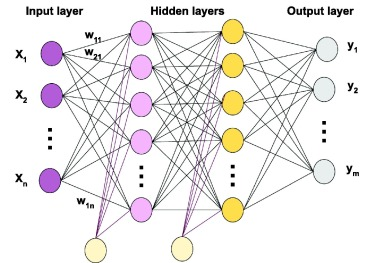




The key hyperparameters for this model are
* Number of hidden layers
* Number of neurons per layer
* Learning rate
* Activation functions

The idea for this project is to apply MLP for a forecasting problem. In this case, we intend to predict the power generation of a wind turbine based on different weather variables (humidity, temperature, among others), location, month and hour of the day.

**Dataset: Wind Turbine Power Generation Forecasting**

In [1]:
# We import useful libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d sudhanvahg/wind-turbine-power-generation-forecasting


Dataset URL: https://www.kaggle.com/datasets/sudhanvahg/wind-turbine-power-generation-forecasting
License(s): CC0-1.0
100% 4.37M/4.37M [00:00<00:00, 37.0MB/s]
100% 4.37M/4.37M [00:00<00:00, 36.9MB/s]


In [4]:
!unzip wind-turbine-power-generation-forecasting.zip

Archive:  wind-turbine-power-generation-forecasting.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: column_info.csv         


In [5]:
# We open the dataframe with pandas
df = pd.read_csv('Train.csv')
df

,Unnamed: 0,Time,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power
0,0,02-01-2013 00:00,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496
1,1,02-01-2013 01:00,1,28.1796,85.664205,24.272595,2.225389,3.997799,150.051683,157.057315,4.336515,0.142396
2,2,02-01-2013 02:00,1,26.5796,90.664205,24.072595,1.465389,2.787799,147.051683,149.057315,3.136515,0.121396
3,3,02-01-2013 03:00,1,27.1796,87.664205,23.872595,1.465389,2.697799,57.051683,104.057315,1.536515,0.100296
4,4,02-01-2013 04:00,1,27.0796,87.664205,23.672595,2.635389,4.437799,57.051683,83.057315,3.936515,0.079296
...,...,...,...,...,...,...,...,...,...,...,...,...
140155,35035,31-12-2016 19:00,4,14.9796,81.664205,10.172595,1.775389,1.867799,149.051683,215.057315,3.236515,0.288196
140156,35036,31-12-2016 20:00,4,8.3796,88.664205,5.572595,3.105389,4.227799,161.051683,174.057315,3.736515,0.257896
140157,35037,31-12-2016 21:00,4,8.4796,88.664205,5.672595,2.765389,5.757799,163.051683,166.057315,4.036515,0.227496
140158,35038,31-12-2016 22:00,4,9.6796,85.664205,6.172595,3.345389,7.537799,166.051683,168.057315,5.336515,0.197196


In [6]:
# We look for the different columns
df.columns.unique()

Index(['Unnamed: 0', 'Time', 'Location', 'Temp_2m', 'RelHum_2m', 'DP_2m',
       'WS_10m', 'WS_100m', 'WD_10m', 'WD_100m', 'WG_10m', 'Power'],
      dtype='object')

The data includes variables such as temperature, relative humidity, wind speed at various altitudes. Moreover, it contains a column with the date and time of the record. Since these are variables of interest, we will convert this column to timeframe and select the month and hour.




In [7]:
# Convert the 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%d-%m-%Y %H:%M')

# Create separate columns for date and hour
df['Month'] = df['Time'].dt.month  # Extract the month
df['Hour'] = df['Time'].dt.hour  # Extract the hour

# Drop the original 'Time' column if it's no longer needed
df = df.drop(columns=['Time'])

# Display the updated DataFrame
df.head()


,Unnamed: 0,Location,Temp_2m,RelHum_2m,DP_2m,WS_10m,WS_100m,WD_10m,WD_100m,WG_10m,Power,Month,Hour
0,0,1,28.2796,84.664205,24.072595,1.605389,1.267799,145.051683,161.057315,1.336515,0.163496,1,0
1,1,1,28.1796,85.664205,24.272595,2.225389,3.997799,150.051683,157.057315,4.336515,0.142396,1,1
2,2,1,26.5796,90.664205,24.072595,1.465389,2.787799,147.051683,149.057315,3.136515,0.121396,1,2
3,3,1,27.1796,87.664205,23.872595,1.465389,2.697799,57.051683,104.057315,1.536515,0.100296,1,3
4,4,1,27.0796,87.664205,23.672595,2.635389,4.437799,57.051683,83.057315,3.936515,0.079296,1,4


In [8]:
df.columns.unique()

Index(['Unnamed: 0', 'Location', 'Temp_2m', 'RelHum_2m', 'DP_2m', 'WS_10m',
       'WS_100m', 'WD_10m', 'WD_100m', 'WG_10m', 'Power', 'Month', 'Hour'],
      dtype='object')

**Preliminary Visual Analysis**

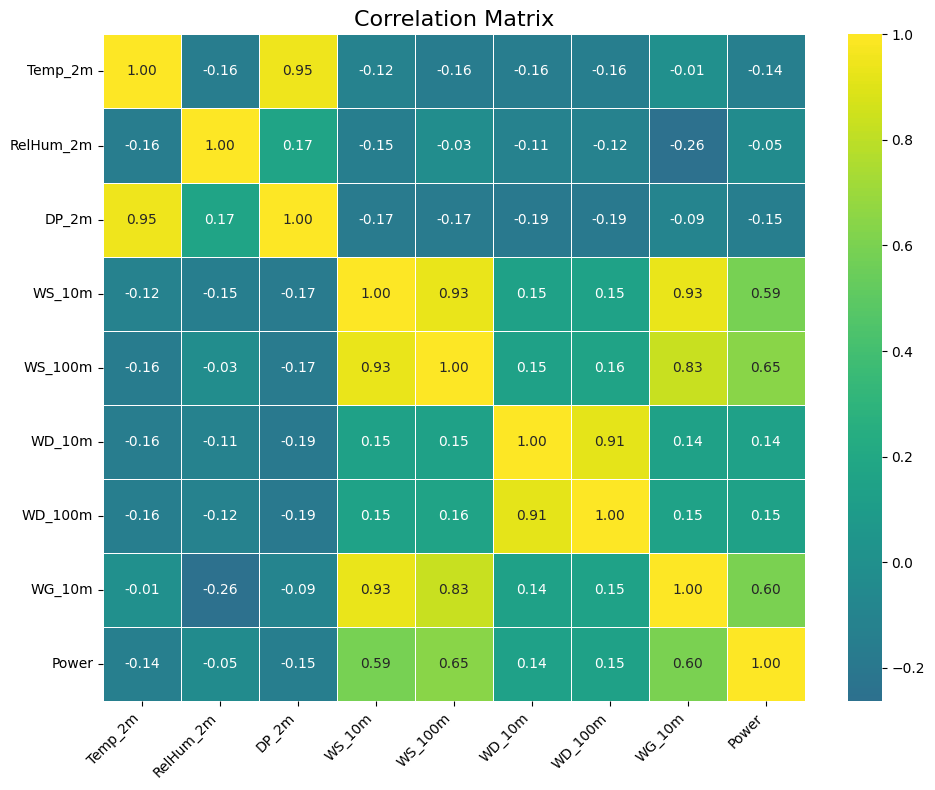

In [20]:
# We build a correlation matrix to have a quick overview on how the variables are related
correlation_matrix = df[['Temp_2m', 'RelHum_2m', 'DP_2m', 'WS_10m', 'WS_100m', 'WD_10m', 'WD_100m', 'WG_10m', 'Power']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


From the correlation matrix, we see that the power seems to be highly correlated to the wind speed at 100m, wind gust at 10m and wind speed at 10m.

Now let's analyze the possible relationship with month and hour of the day.

<ipython-input-11-a991504d7d9b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Power', data=df, palette='viridis', showfliers=False)  # Disable outliers


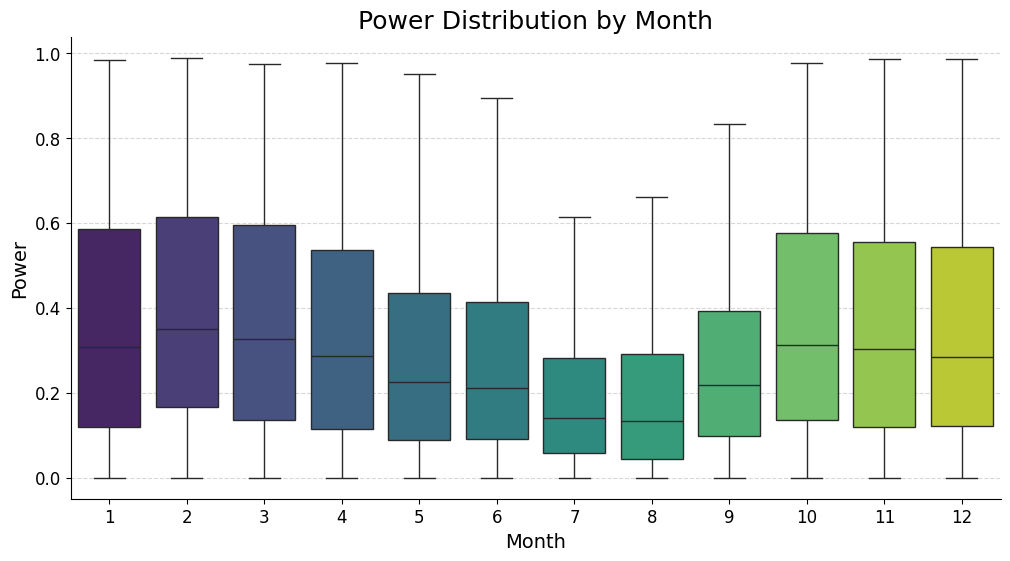

In [11]:
# Boxplot of Power by Month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Power', data=df, palette='viridis', showfliers=False)  # Disable outliers
plt.title('Power Distribution by Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.show()

We can see that the month, or season, may also affet the power generated.

<ipython-input-12-9c4e3f39d231>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='Power', data=df, palette='viridis', showfliers=False)  # Disable outliers


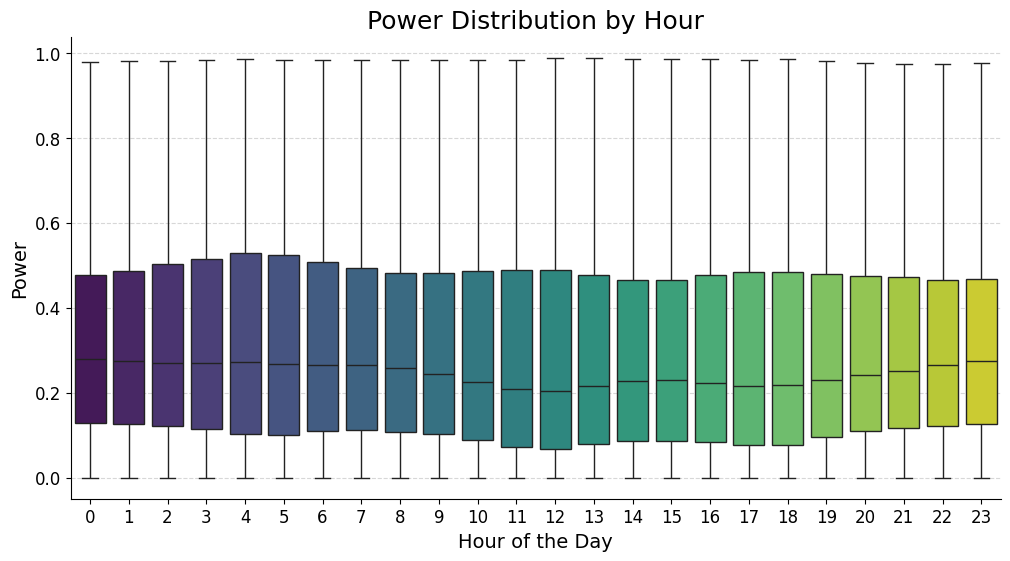

In [12]:
# Boxplot of Power by Hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Power', data=df, palette='viridis', showfliers=False)  # Disable outliers
plt.title('Power Distribution by Hour', fontsize=18)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.show()

There are slight differences, but they don't seem to be significant.

<ipython-input-25-34e8d6af1fa3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Power', data=df, palette='viridis', showfliers=False)  # Disable outliers


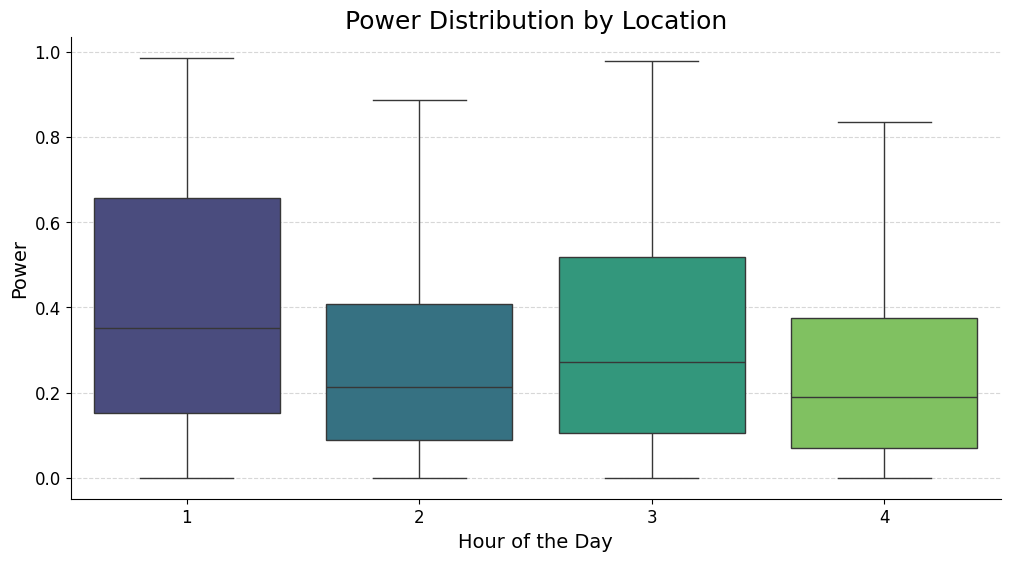

In [25]:
# Boxplot of Power by Location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Power', data=df, palette='viridis', showfliers=False)  # Disable outliers
plt.title('Power Distribution by Location', fontsize=18)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.show()

We can see that the location might explain some of the variability in the power generated.

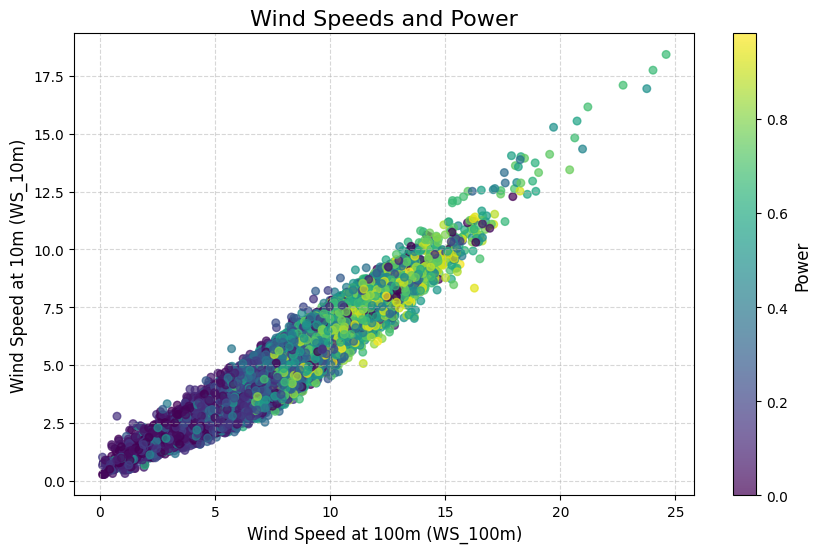

In [21]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sampled_df['WS_100m'],
    sampled_df['WS_10m'],
    c=sampled_df['Power'],
    cmap='viridis',
    s=30, alpha=0.7
)

cbar = plt.colorbar(scatter)
cbar.set_label('Power', fontsize=12)
plt.title('Wind Speeds and Power', fontsize=16)
plt.xlabel('Wind Speed at 100m (WS_100m)', fontsize=12)
plt.ylabel('Wind Speed at 10m (WS_10m)', fontsize=12)
plt.grid(linestyle='--', alpha=0.5)

plt.show()




We can see that the power increases as the wind at 100m and the wind at 10m do. Also, the wind speed at 10m is very strongly correlated to the wind speed at 100m. This means that there is collinearity, and we don't need both variables for the model.

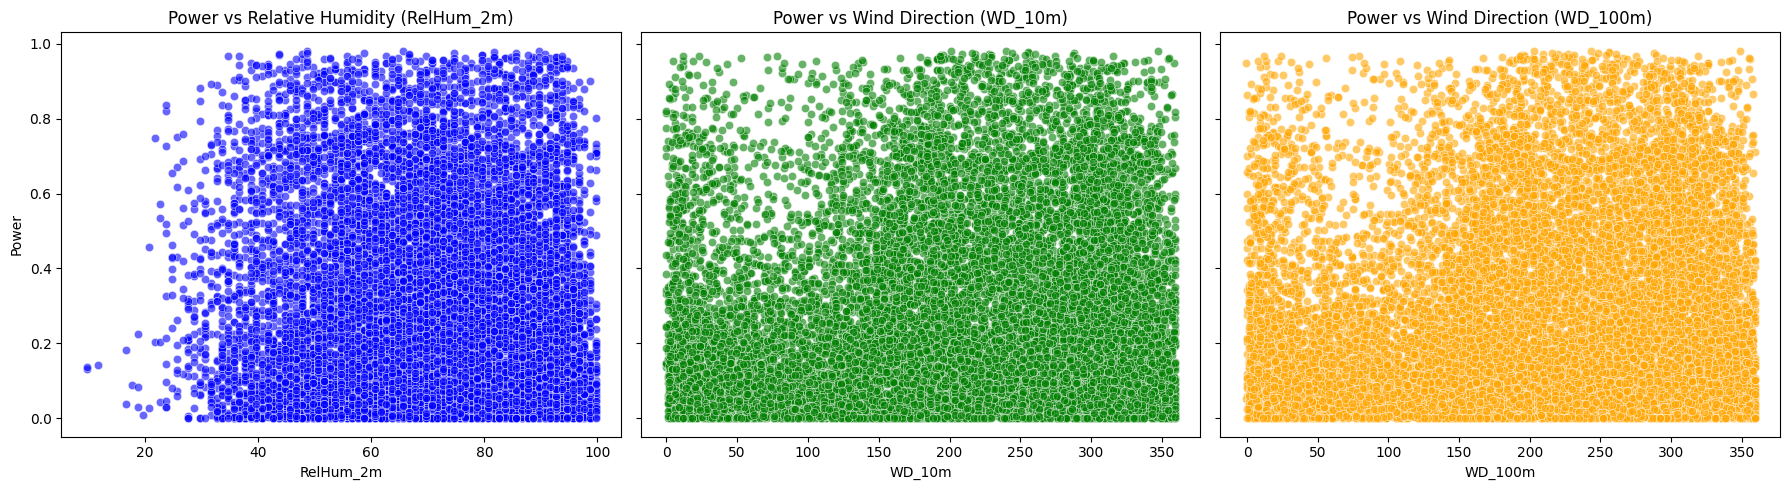

In [23]:
# We sample 10% of the dataset for visualization
sampled_df = df.sample(frac=0.1, random_state=42)  # 10% of the data

# We create small graphs (subplots) for Power vs RelHum_2m, WD_10m, and WD_100m with the sampled data
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot 1: Power vs RelHum_2m
sns.scatterplot(x='RelHum_2m', y='Power', data=sampled_df, ax=axes[0], color='blue', alpha=0.6)
axes[0].set_title('Power vs Relative Humidity (RelHum_2m)', fontsize=12)
axes[0].set_xlabel('RelHum_2m')
axes[0].set_ylabel('Power')

# Plot 2: Power vs WD_10m
sns.scatterplot(x='WD_10m', y='Power', data=sampled_df, ax=axes[1], color='green', alpha=0.6)
axes[1].set_title('Power vs Wind Direction (WD_10m)', fontsize=12)
axes[1].set_xlabel('WD_10m')

# Plot 3: Power vs WD_100m
sns.scatterplot(x='WD_100m', y='Power', data=sampled_df, ax=axes[2], color='orange', alpha=0.6)
axes[2].set_title('Power vs Wind Direction (WD_100m)', fontsize=12)
axes[2].set_xlabel('WD_100m')

plt.tight_layout()
plt.show()


As already anticipated in the correlation matrix, these variables don't seem to explain the changes in the power generated very much, which is why it might be better to take them out from our model.

**MLP model**

Features:


*   Wind speed at 100m
*   Month
*   Location
* Wind gust at 10m

Target variable:
* Power generated

Hyperparameters:
* 2 hidden layers
* 64 neurons per layer
* learning rate 0.01




In [33]:
# We define our features and target variable
selected_features = ['WS_100m', 'WG_10m', 'Month', 'Location']
X = df[selected_features]
y = df['Power']
X = df.drop(columns=['Power']).values
y = df['Power'].values  # Target variable

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"Test R-squared (R²): {r2}")



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0307 - mae: 0.1321 - val_loss: 0.0222 - val_mae: 0.1116
Epoch 2/5
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0217 - mae: 0.1106 - val_loss: 0.0216 - val_mae: 0.1110
Epoch 3/5
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0207 - mae: 0.1078 - val_loss: 0.0203 - val_mae: 0.1064
Epoch 4/5
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0199 - mae: 0.1055 - val_loss: 0.0200 - val_mae: 0.1047
Epoch 5/5
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0195 - mae: 0.1045 - val_loss: 0.0197 - val_mae: 0.1040
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0194 - mae: 0.1036
Test MAE: 0.1040148213505745
876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test R-squared (R²): 0.6932997943044072


In [27]:
# Get the range of the Power column to analyze the MAE
power_min = df['Power'].min()
power_max = df['Power'].max()
power_range = power_max - power_min

print(f"Power Minimum: {power_min}")
print(f"Power Maximum: {power_max}")
print(f"Power Range: {power_range}")


Power Minimum: -4.11e-06
Power Maximum: 0.988795886
Power Range: 0.988799996


From the training and validation metrics, it's possible to see that the model is learning effectively, since both training and validation errors decreased consistently across the epochs.

Also, the similarity between training and validation metrics suggest no overfitting.

On the other hand, with regards to the test results, the R2 suggests that the model is explaining 69.3% of the variance in the target variable (power generated/hour). This is a good result, but we can try tuning the hyperparameters of the model to see if we can achieve a better model, with a higher accuracy. As to the MAE, we see that a value of 0.104 represents about 10.4% of the power range. This is a moderate error. We'll see if tuning the hyperparamets helps to get a lower value.

**Changing hyperparameters**

For hyperparameter tuning, we will use Keras Tuner, a library used to optimize model configurations such as the number of layers, neurons or learning rates.

The steps for this procedure are:


1.   Creating a model-building function to allow Keras Tuner to test different configurations (e.g., 1-3 layers, 32/64/128 neurons, various learning rates)
2.   Using tools like RandomSearch to run experiments with different combinations of hyperparameters (setting up the tuner)
3. Running the tuner ny training the model with various configurations to identify the best-performing one based on a determined metric (in this case, the MAE)



In [28]:
# We install Keras Tuner
!pip install keras-tuner -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [29]:
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) We define a model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()

    # Tune the number of hidden layers (between 1 and 2)
    for i in range(hp.Int('num_layers', 1, 2)):  # Simpler models with fewer layers
        # Tune the number of neurons per layer (16, 32, 64)
        model.add(Dense(
            units=hp.Choice('units_' + str(i), [16, 32, 64]),
            activation='relu'
        ))
        # Optional: Add dropout for regularization
        model.add(Dense(units=hp.Choice('units_' + str(i), [16, 32, 64]), activation='relu'))

    # Output layer for regression
    model.add(Dense(1))

    # Tune the learning rate (larger steps for simplicity)
    learning_rate = hp.Choice('learning_rate', [0.01, 0.001, 0.0001])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])

    return model

<ipython-input-29-b23f7e511d9e>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [30]:
# 2) We use Random Search to try different configurations
from kerastuner.tuners import RandomSearch

from kerastuner.tuners import RandomSearch

# Initialize the tuner with an expanded search space
tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=5,  # Reduced number of trials
    executions_per_trial=1,  # Only one execution per trial
    directory='keras_tuner_results',
    project_name='simpler_model_tuning'
)

# Run the tuner search with 5 epochs.
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)


Trial 5 Complete [00h 00m 53s]
val_mae: 0.11320324242115021

Best val_mae So Far: 0.1086551770567894
Total elapsed time: 00h 04m 10s


We can see that the search concluded that the best MAE is 0.1086. Now let's see what happens if we use the best configuration and we increase the number of epochs to 20.

In [31]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of layers is: {best_hps.get('num_layers')}
The optimal units in each layer are: {[best_hps.get(f'units_{i}') for i in range(best_hps.get('num_layers'))]}
The optimal learning rate for the optimizer is: {best_hps.get('learning_rate')}
""")

# Build and train the best model with 20 epochs.
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

# Evaluate the best model
loss, mae = best_model.evaluate(X_test, y_test)
print(f"Best Model Test MAE: {mae}")



The optimal number of layers is: 1
The optimal units in each layer are: [32]
The optimal learning rate for the optimizer is: 0.001

Epoch 1/20
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0367 - mae: 0.1431 - val_loss: 0.0240 - val_mae: 0.1148
Epoch 2/20
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0226 - mae: 0.1132 - val_loss: 0.0225 - val_mae: 0.1103
Epoch 3/20
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0215 - mae: 0.1100 - val_loss: 0.0215 - val_mae: 0.1099
Epoch 4/20
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0211 - mae: 0.1085 - val_loss: 0.0210 - val_mae: 0.1071
Epoch 5/20
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0206 - mae: 0.1074 - val_loss: 0.0204 - val_mae: 0.1058
Epoch 6/20
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0203 - mae: 0.1065 - val_loss: 0.0203 - val_mae: 0.1067
Epoch 7/20
3504/3504 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0200 - mae: 0.1059 - val_loss: 0.0202 - val_mae: 0.1071
Epoch 8/20
3504/3504 ━━━━

In [32]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"Test R-squared (R²): {r2}")


876/876 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test R-squared (R²): 0.707113367402953


We can see that the best performing model (from the ones we tried with our search) has the following configuration:



*   1 hidden layer
*   32 neurons
*   learning rate 0.01

With this configuration, both the accuracy R2 and the MAE were improved. The model achieved an accuracy of 70.7% and a MAE of 0.102.




